# Analysis of the results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import myscripts.helper as H
from myscripts.myplot import *

In [2]:
# matplotlib settings
%matplotlib inline
plt.style.use('/Users/sst/visual.mplstyle')

In [3]:
# pandas settings
pd.set_option('float_format', '{:.2e}'.format)

## Data information

In [4]:
DATA = pd.read_csv('meta/old_data.csv')
DATA

,sample,c,iq,sq,fq,gr
0,JBNP31,#0B3C5D,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...
1,JBNP32L,#B82601,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...
2,JBNP32,#1c6b0a,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...
3,JBNP33L,#328CC1,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...
4,JBNP33,#D9B310,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...


## Characteristic functions

What characteristic functions are the best? What do them tell?

In [5]:
CSV = pd.read_csv('meta/csv.csv').loc[85:]
FGR = pd.read_csv('meta/fgr.csv').loc[85:]

FGR['c'] = DATA.set_index('sample').loc[FGR['name'], 'c'].to_list()

In [6]:
index = pd.DataFrame({
    'Two SphericalCFs': [85, 86, 94, 87, 95],  # Two SphericalCFs
    'SpheroidalCF': [88, 89, 96, 90, 97],  # SpheroidalCF
    'LognormalSphericalCF': [91, 92, 98, 93, 99],  # LognormalSphericalCF
}, dtype=int)

#### Fitted PDFs

All three characteristic functions are indistinguishable by fitted PDFs. The $R_w$ and residuals are basically the same. All functions fit the data well.

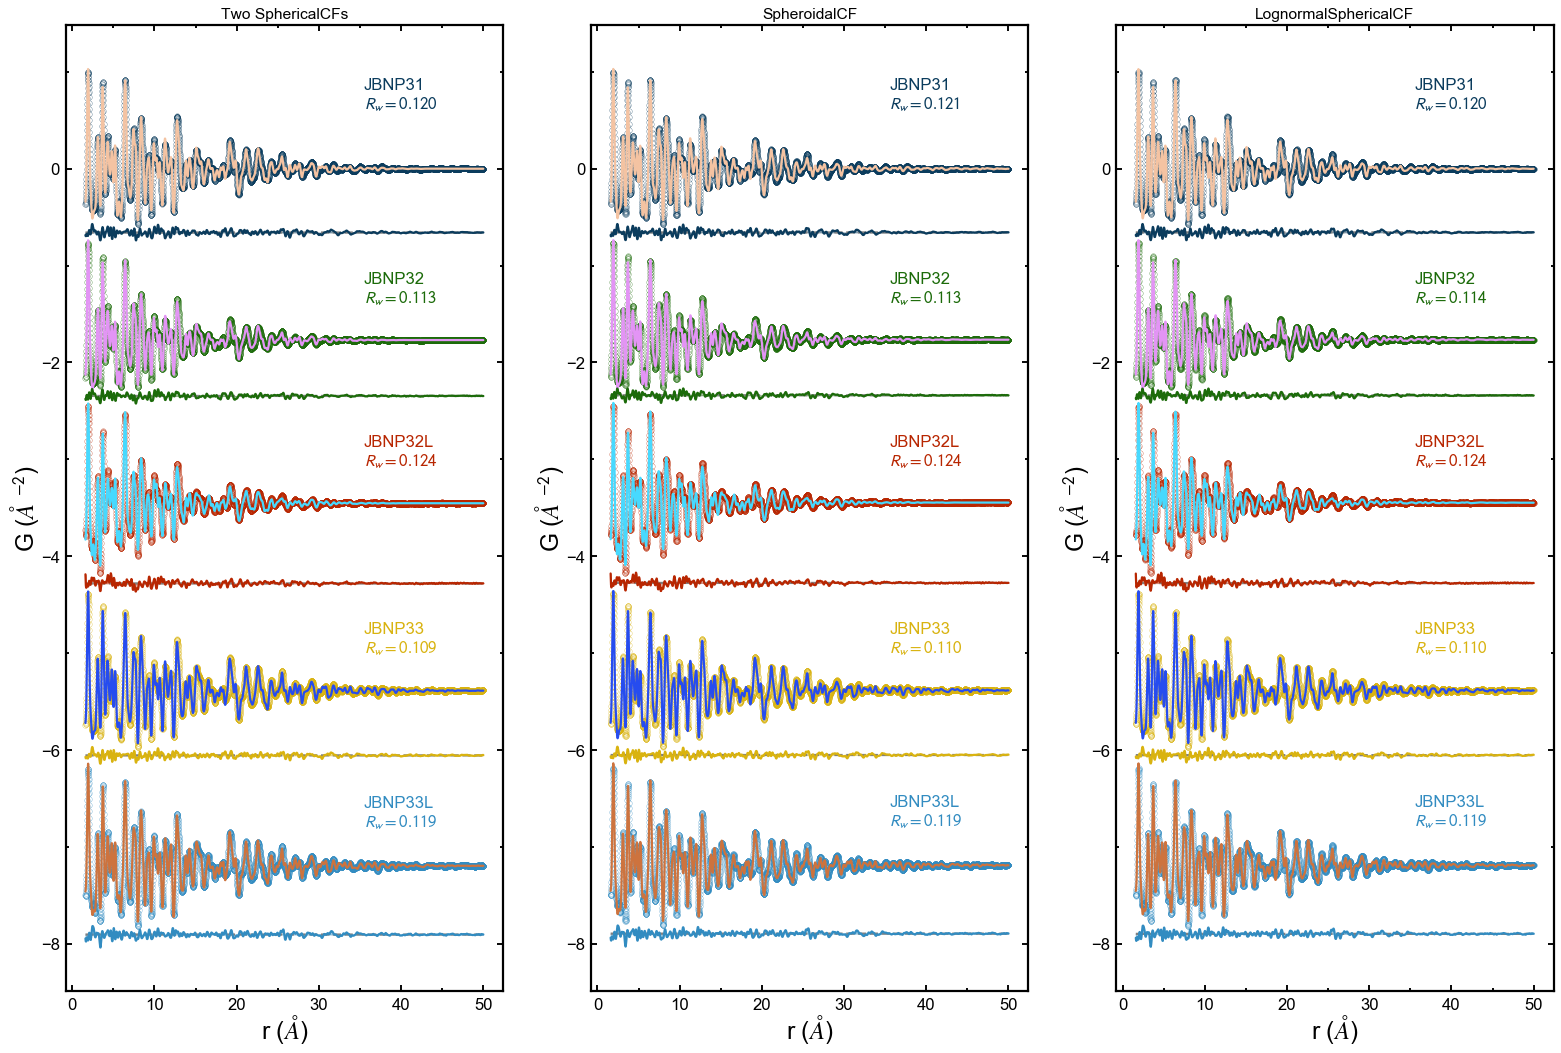

In [12]:
plt.figure(figsize=(24, 16))

ax = plt.subplot(131)
fitting = index.iloc[:, 0]
fgr = FGR.loc[fitting]
plot_fgr(fgr['file'], names=fgr['name'], colors=fgr['c'], normal=True, auto_rw=True)
plt.title(fitting.name)

plt.subplot(132, sharey=ax)
fitting = index.iloc[:, 1]
fgr = FGR.loc[fitting]
plot_fgr(fgr['file'], names=fgr['name'], colors=fgr['c'], normal=True, auto_rw=True)
plt.title(fitting.name)

plt.subplot(133, sharey=ax)
fitting = index.iloc[:, 2]
fgr = FGR.loc[fitting]
plot_fgr(fgr['file'], names=fgr['name'], colors=fgr['c'], normal=True, auto_rw=True)
plt.title(fitting.name)

plt.show()

### Fitting Results

2Spherical: Nonthing to say.

Spheroidal: The JBNP31 prefers the polar direction while the others tend to be longer along equator direction.

Lognormal: The average particle size is small.

In [13]:
res_dct = {}
num_rows = [4, 3, 3]
for (cf, index), num_row in zip(index.iteritems(), num_rows):
    csv = CSV.loc[index]
    res = H.join_result_with_std(csv['file'], column_names=csv['name'])
    res = res.iloc[2:]
    res_dct[cf] = res
    print(res.head(num_row).to_string(col_space=16), end='\n\n')

                           JBNP31           JBNP32          JBNP32L           JBNP33          JBNP33L
frac_b1                 0.7+/-0.4        0.5+/-0.4        0.4+/-1.1      0.71+/-0.32        0.7+/-0.6
psize_Bronze_1            46+/-14          43+/-18      (4+/-5)e+01          52+/-14          53+/-23
psize_Bronze_2            21+/-16          19+/-10          22+/-23          21+/-17          24+/-28
scale_Bronze          0.54+/-0.09      0.53+/-0.11      0.30+/-0.14      0.52+/-0.09      0.39+/-0.09

                           JBNP31           JBNP32          JBNP32L           JBNP33          JBNP33L
erad_Bronze            14.6+/-3.5          29+/-13          26+/-21          38+/-22          37+/-28
prad_Bronze       (0.7+/-2.9)e+02            8+/-4            8+/-8           12+/-5           12+/-7
scale_Bronze          0.52+/-0.07      0.53+/-0.11      0.30+/-0.16      0.50+/-0.07      0.39+/-0.07

                           JBNP31           JBNP32          JBNP32L           JB